In [82]:
import os
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
# Reading data
image_data = pd.read_csv('fashion-mnist_test.csv')

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [84]:
# Storing image labels 
image_labels = image_data.iloc[:,0]

# Normalizing pixel values in a range of 0-1
image_data = image_data.iloc[:,1:]/255.0

# Number of images to visualize
embed_count = 400

# Subsetted data
image_labels = image_labels[:embed_count]
image_data = image_data.iloc[:embed_count,:]

In [87]:
# Defining a directory 
logdir = r'records'

# Setup embedding tensor
embedding_var = tf.Variable(image_data, name='FashionMNIST') # Tensor name
config = projector.ProjectorConfig() # Initiating configuration
embedding = config.embeddings.add()  # Add tensor to the container

# Setup names and paths for meta-data and sprite image
embedding.tensor_name = embedding_var.name
embedding.metadata_path = os.path.join(logdir,'metadata.tsv')
embedding.sprite.image_path = os.path.join(logdir,'sprite.png')
embedding.sprite.single_image_dim.extend([28, 28])

# Write to the projector config file
summary_writer = tf.summary.FileWriter(logdir)
projector.visualize_embeddings(summary_writer, config)

In [88]:
# Create model checkpoint
with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.save(sesh, os.path.join(logdir, 'model.ckpt'))

In [89]:
# Setting up dimension of sprite image
rows = 28
cols = 28
sprite_dim = int(np.sqrt(embed_count))
sprite_image = np.ones((cols * sprite_dim, rows * sprite_dim))

# Create the sprite image and the metadata file
index = 0
labels = []
for i in range(sprite_dim):
    for j in range(sprite_dim):
        
        # Add labels for each image
        labels.append(class_names[int(test_labels[index])]) 
        
        # Write the sprite image and invert the color to white background and black clothing item
        sprite_image[
            i * cols: (i + 1) * cols,
            j * rows: (j + 1) * rows
        ] = test_data.iloc[index].reshape(28, 28) * -1 + 1
        
        index += 1

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [90]:
# Save metadata to file        
with open(embedding.metadata_path, 'w') as meta:
    meta.write('Index\tLabel\n')
    for index, label in enumerate(labels):
        meta.write('{}\t{}\n'.format(index, label))

In [91]:
# Save sprite image to file        
plt.imsave(embedding.sprite.image_path, sprite_image, cmap='gray')

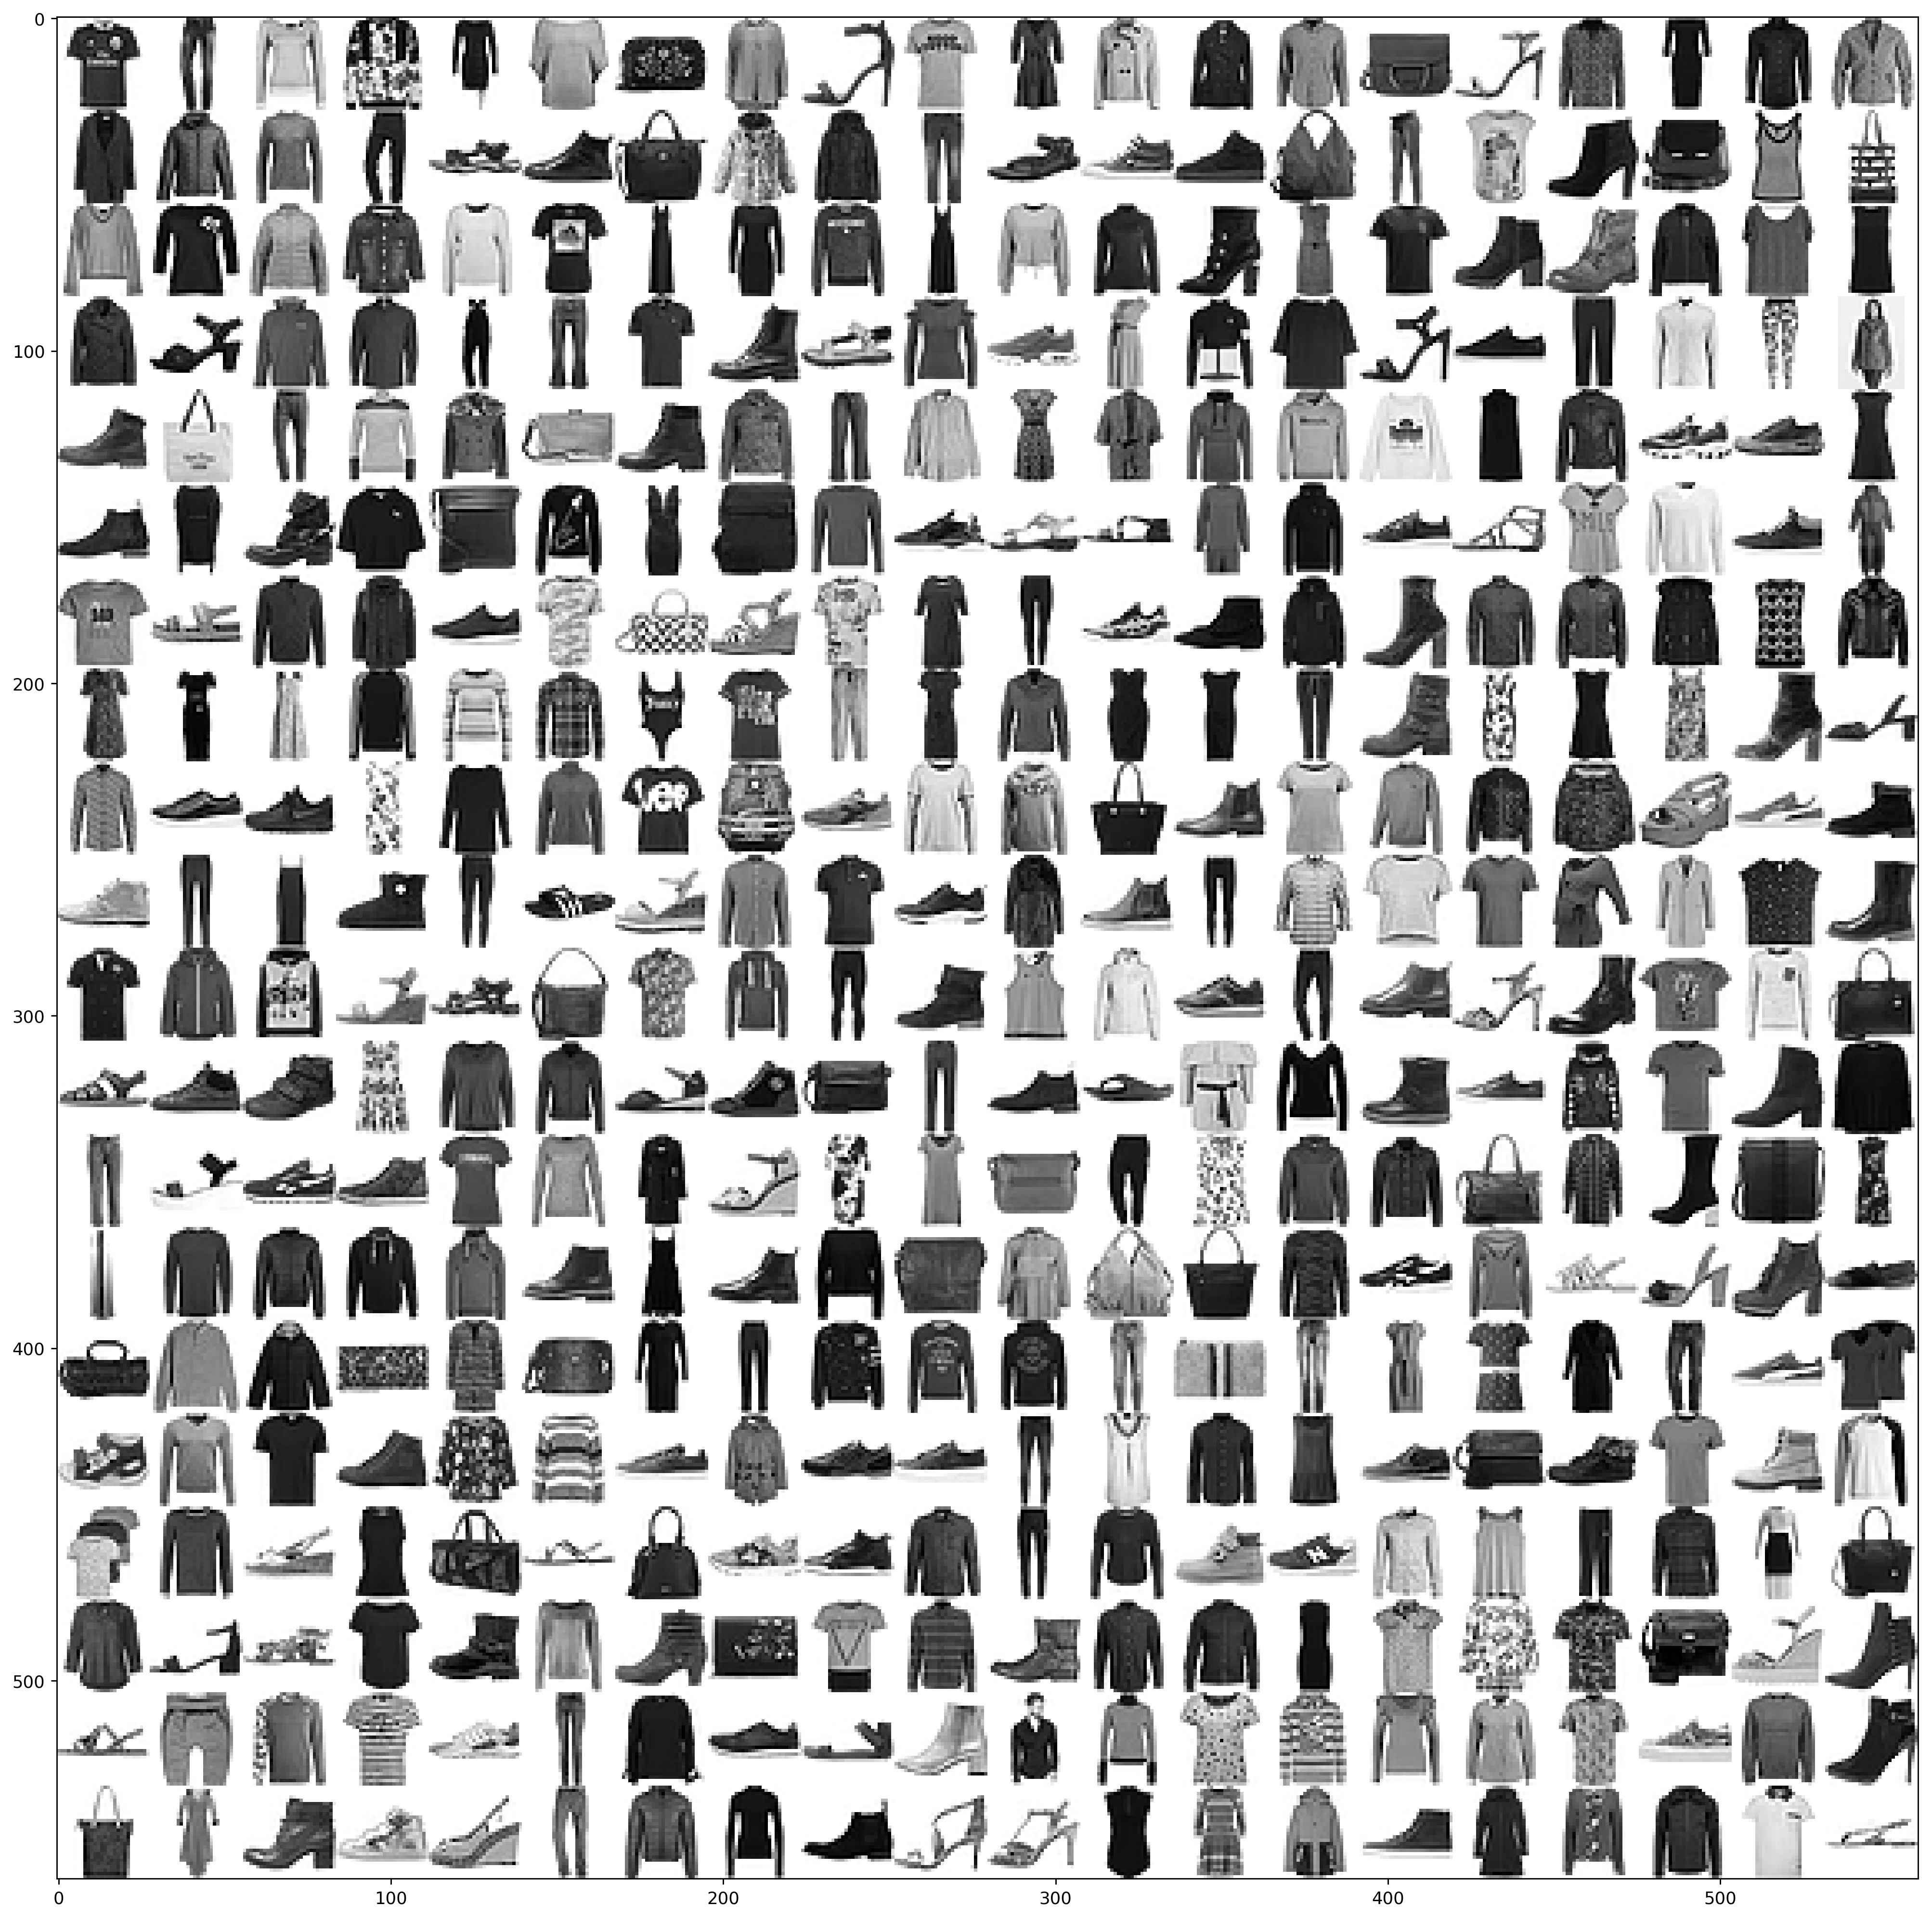

In [97]:
# Show sprite image
plt.figure(figsize=(20,20), dpi=256)
plt.imshow(sprite_image, cmap='gray')
plt.show()

#### Tensorboard
Open projector_config.pbtxt under 'records' directory. Remove 'records\\\' from metadata_path and image_path. Save and exit the file.  
Next, open Anaconda Prompt and run following command -  
* Change to directory in which 'records' directory is present. Assuming 'records' is present on Desktop run below command  
  cd Desktop  
* tensorboard --logdir=records
* Copy and run the URL (e.g. http://MYSGEC854775d:6006) in web browser generated by running above command.
* Under Projection tab of tensorboard select 'Label' under 'Color by' option on Left column.
* Visualize using PCA or T-SNE. Stop iteration of T-SNE when required.